In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cross_validation, metrics
from sklearn.tree import DecisionTreeClassifier

d:\programfiles\python35\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# label

In [2]:
labels = {'0':'file', '1':'network', '2':'service', '3':'database', '4':'communication', '5':'memory', '6':'driver', 
    '7':'system', '8':'application', '9':'io', '10':'others', '11':'security', '12':'disk', '13':'processor'}

fault_label = {'0':'file', '1':'network', '2':'service', '3':'database','5':'memory', 
               '10':'others', '11':'security', '12':'disk', '13':'processor'}

# load data

In [3]:
train_X, test_X = [],[]
train_y, test_y = [],[]

print("loading data...")

try:
    with open("data_msg_type/semantic_train_x.txt", 'rU') as f:
        res = list(f)
        for line in res:
            line.strip("\n")
            features = line.split("\t")
            while features.__contains__(""):
                features.remove("")
            for i in range(len(features)):
                features[i] = float(features[i])
            train_X.append(features)
         
    #read the classes from file and put them in list.      
    with open("data_msg_type/semantic_train_y.txt", 'rU') as f:
        res = list(f)
        for line in res:
            train_y.append(int(line.strip("\n")[0]))         
except:
    print("Error in reading the train set file.")
    exit()
    
try:
    with open("data_msg_type/semantic_test_x.txt", 'rU') as f:
        res = list(f)
        for line in res:
            line.strip("\n")
            features = line.split("\t")
            while features.__contains__(""):
                features.remove("")
            for i in range(len(features)):
                features[i] = float(features[i])
            test_X.append(features)
         
    #read the classes from file and put them in list.      
    with open("data_msg_type/semantic_test_y.txt", 'rU') as f:
        res = list(f)
        for line in res:
            test_y.append(int(line.strip("\n")[0]))         
except:
    print("Error in reading the train set file.")
    exit()

print("Dataset loaded.")

loading data...


d:\programfiles\python35\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 'U' mode is deprecated
  import sys
d:\programfiles\python35\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: 'U' mode is deprecated
d:\programfiles\python35\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: 'U' mode is deprecated


Dataset loaded.


d:\programfiles\python35\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: 'U' mode is deprecated


# convert data

In [4]:
X_train = np.array(train_X) #change to matrix
y_train = np.array(train_y) #change to matrix
X_test = np.array(test_X) #change to matrix
y_test = np.array(test_y) #change to matrix

# decision_tree train

In [5]:
print("---------------decision_tree---------------")

dt_clf = DecisionTreeClassifier(criterion='gini', splitter='best',  max_depth=5, min_samples_split=2, min_samples_leaf=1, 
            min_weight_fraction_leaf=0.0, max_features=None, random_state=None, 
            max_leaf_nodes=None, min_impurity_split=1e-07,  class_weight=None, presort=False)
scores = cross_validation.cross_val_score(dt_clf, X_train, y_train, scoring="accuracy", cv=14)

---------------decision_tree---------------


d:\programfiles\python35\lib\site-packages\sklearn\cross_validation.py:552: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=14.
  % (min_labels, self.n_folds)), Warning)


# test and predict

In [8]:
dt_clf = dt_clf.fit(X_train, y_train)

dt_clf_test_score = dt_clf.score(X_test, y_test)

# save trained model for future use.
#joblib.dump(rf_clf,'data/rf_clf.pkl', compress=9)

count1 = 0
count2 = 0
actualist = []
predlist = []

for i in range(len(X_test)):
    count2 += 1
    classinrow = X_test[i]
    classinrow = np.array(X_test[i]).reshape(1,-1)
    # each xval is a set of features la one sample.
    # predict class for each row.. each i is a row.
    predicted = dt_clf.predict(classinrow)
    actual = y_test[i]
    actualist.append(actual)
    predlist.append(predicted[0])
    if predicted == actual:
        count1 += 1

print("Results: ", scores)
print("Test set accuracy: ", dt_clf_test_score)
print("Total cases: ", count2)
print("Correct Prediction: ", count1)
print("Correct prediction rate: ", float(count1) / count2)

Results:  [ 0.82546345  0.90766002  0.91411579  0.92723456  0.94889744  0.97917396
  0.98564928  0.98862443  0.98914756  0.98862244  0.98984772  0.96130952
  0.94292717  0.95097181]
Test set accuracy:  0.9682
Total cases:  20000
Correct Prediction:  19364
Correct prediction rate:  0.9682


# plot

d:\programfiles\python35\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

     memory       0.87      0.83      0.85       473
   security       0.86      0.71      0.78       911
    network       1.00      1.00      1.00       213
       disk       0.00      0.00      0.00         2
    service       0.95      0.98      0.96      2891
     others       0.65      0.84      0.73       348
   database       1.00      1.00      1.00     14495
       file       0.73      0.70      0.72       535
  processor       0.90      1.00      0.95       132

avg / total       0.97      0.97      0.97     20000

[[  392    11     0     0    41    18     0    11     0]
 [   28   644     0     0    52    87     4    90     6]
 [    0     0   213     0     0     0     0     0     0]
 [    2     0     0     0     0     0     0     0     0]
 [    1    46     0     0  2829    10     0     4     1]
 [    1    24     0     0     0   291     0    32     0]
 [    2     0     0     0     0     7 14486     0     0]
 [   24    25  

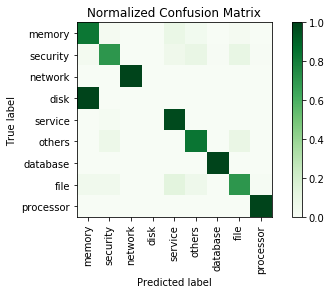

In [9]:
# cmap can be changed to many colors, (colormaps.Oranges,OrRd, etc)
def plot_CM(cm, title="Normalized Confusion Matrix", cmap=plt.cm.Greens):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(fault_label))
    plt.xticks(tick_marks, fault_label.values(), rotation=90)
    plt.yticks(tick_marks, fault_label.values())
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

print(metrics.classification_report(
    actualist, predlist, target_names = list(fault_label.values())))
cm = metrics.confusion_matrix(actualist, predlist)
print(cm)

# show a normalized matrix as a separate figure.
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
plt.figure()
plot_CM(cm_normalized)

precision: 0.9692
recall: 0.9690
f1-score: 0.9662